In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Library/Python/2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/data_for_paper_attempt2/')

In [3]:
trace_a = pickle.load(open('earm_mtdreamzs_5chain_a.p'))
trace_b = pickle.load(open('earm_mtdreamzs_5chain_b.p'))
trace_c = pickle.load(open('earm_mtdreamzs_5chain_c.p'))
trace_d = pickle.load(open('earm_mtdreamzs_5chain_d.p'))

In [4]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [5]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [17]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [20]:
for trace in [param_trace_a, param_trace_b, param_trace_c, param_trace_d]:
    del trace['param_list']

In [22]:
os.chdir('/Users/Erin/git/moo_and_mcmc/emcee/')

In [23]:
from earm_uniform_emcee import log_post

In [25]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -2309.73885803  post:  -2592.21826924
prior:  -282.479411206  like:  -2396.21520223  post:  -2678.69461343
prior:  -282.479411206  like:  -2335.32419793  post:  -2617.80360914
prior:  -282.479411206  like:  -2526.41824651  post:  -2808.89765772
prior:  -282.479411206  like:  -1683.58280264  post:  -1966.06221384
prior:  -282.479411206  like:  -2335.0897622  post:  -2617.5691734
prior:  -282.479411206  like:  -2305.74476847  post:  -2588.22417968
prior:  -282.479411206  like:  -2153.46290385  post:  -2435.94231506
prior:  -282.479411206  like:  -2285.39049076  post:  -2567.86990197
prior:  -282.479411206  like:  -2365.91366424  post:  -2648.39307545
prior:  -282.479411206  like:  -2061.33127839  post:  -2343.81068959
prior:  -282.479411206  like:  -2745.4820511  post:  -3027.96146231
prior:  -282.479411206  like:  -2024.72225261  post:  -2307.20166381
prior:  -282.479411206  like:  -2084.29627072  post:  -2366.77568192
prior:  -282.479411206  like:  -2357.

60000
5
60000


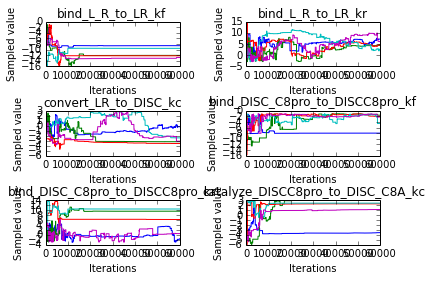

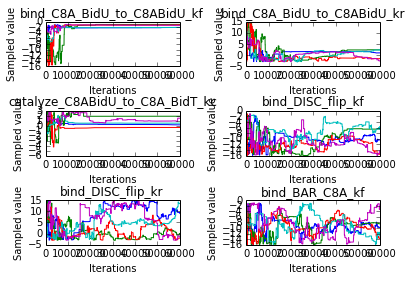

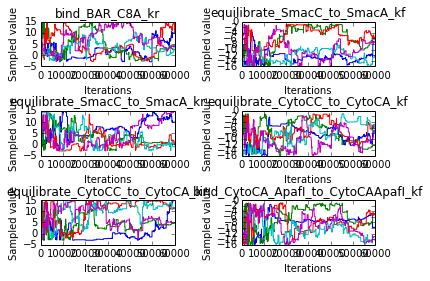

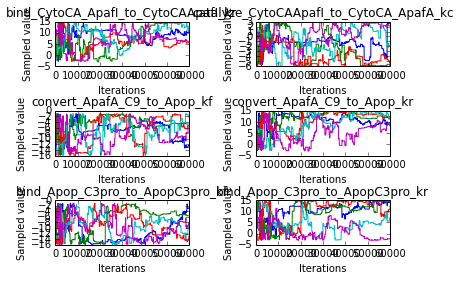

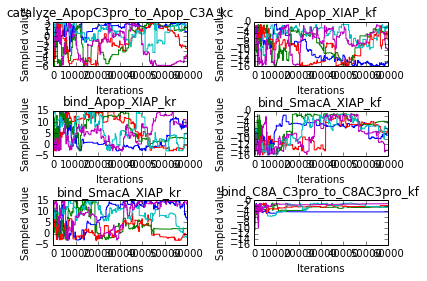

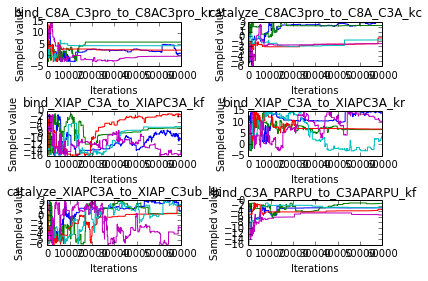

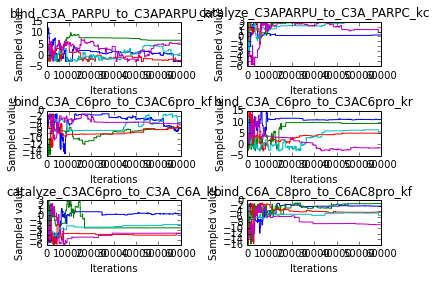

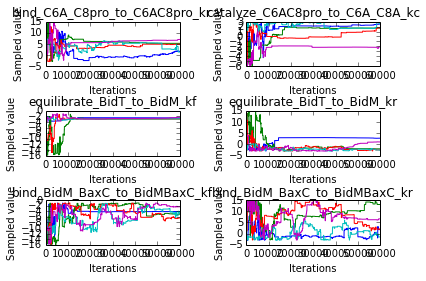

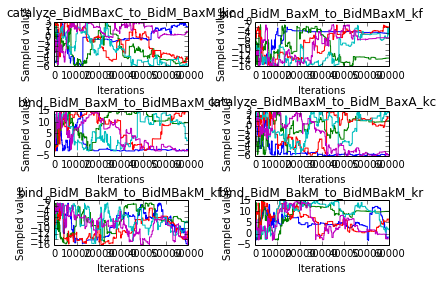

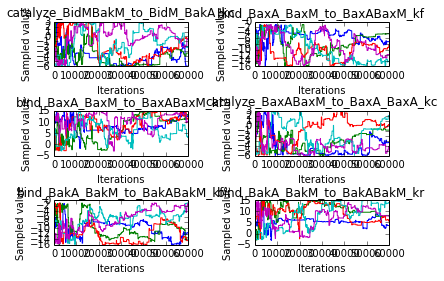

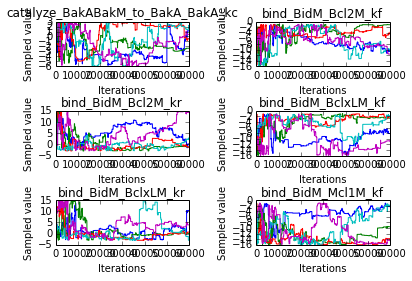

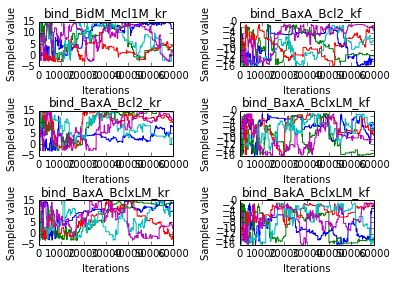

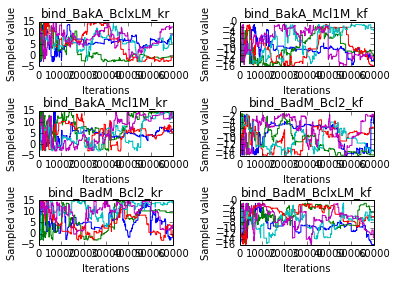

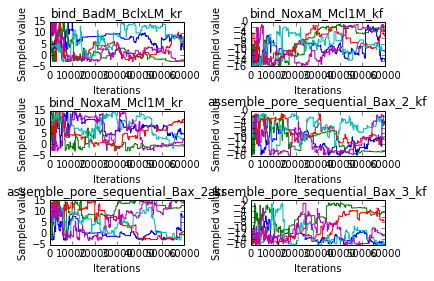

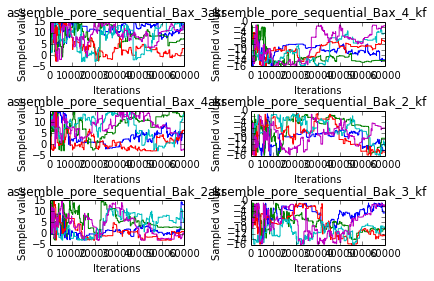

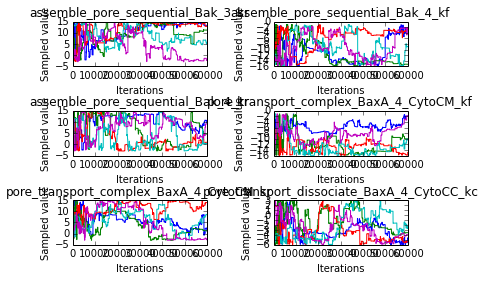

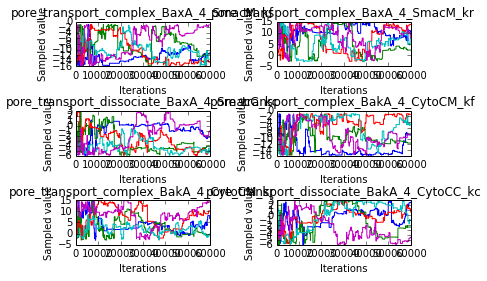

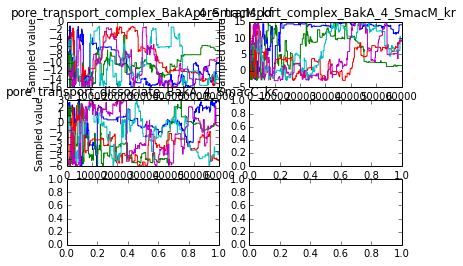

In [18]:
sample_plots(param_trace_a)